In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return(x*x*x - 6*x*x + 4)

_________ -8.984975000001327
Gradient_search: 
 x* = 3.9981873445980227, f(x*) = -27.999980291638238, steps = 4


Text(4.1, -26, 'minimum')

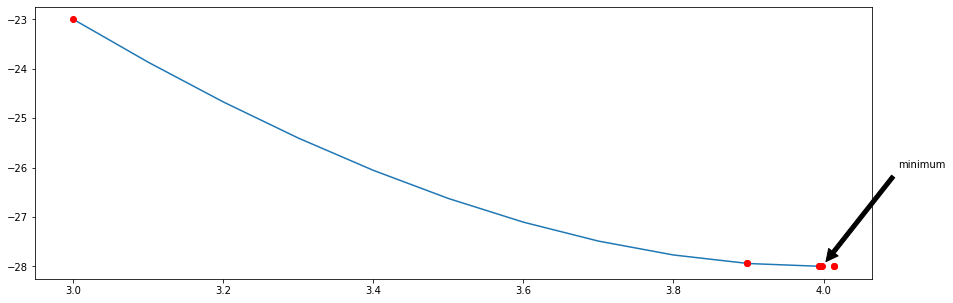

In [4]:
def grad_f(x, step=0.005):
    #return((3*x*x - 12*x)) # why it doesn't work???
    return((function(x + step) - function(x)) / step)
    
def gradient_search(x, t, e1, e2, n):
    X_list, FX_list = ([] for i in range(2))
    k = 0
    grad = grad_f(x)
    print("_________", grad)
    x1 = x
    x2 = x1 - t*grad
    while (function(x2) - function(x1)) < 0:
        X_list.extend([x1, x2])
        FX_list.extend([function(x1), function(x2)])
        if k < n and math.fabs(grad) > e1 and math.fabs(function(x2) - function(x1)) > e2:
            x1 = x2
            grad = grad_f(x1)
            x2 = x1 - t*grad
            k += 1
        else:
            print(x1, function(x1))
            return(x1)
    x_point = x1
    fx_point = function(x_point)
    print("Gradient_search: \n x* = {0}, f(x*) = {1}, steps = {2}".format(x_point, fx_point, k))
    return(X_list, FX_list, x_point, fx_point)
    
X_list, FX_list, x_point, fx_point = gradient_search(3, 0.1, 0.0001, 0.0001, 100)


g_x = np.arange(min(X_list), max(X_list), 0.1)
g_y = [function(i) for i in g_x]

fig, ax = plt.subplots(figsize = (15, 5))   
ax.plot(g_x, g_y)
ax.plot(X_list, FX_list, 'ro')
ax.annotate('minimum', xy=(x_point, fx_point), xytext=(4.1, -26),
                   arrowprops=dict(facecolor='black', shrink=0.05))
#plt.savefig('path.png', dpi=300)